# Creates Owens Corning Sales line plots

In [52]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

import seaborn as sns 
sns.set() #resets the asethical features to default
sns.set_style("white")

encoding = "cp1252"
encoding = "ISO-8859-1"

import plotly.express as px

# GR

In [54]:
path = <use yours>
used_columns = ['External/Downstream', 'End Use Market', 'Sales', 'Region', 'End Use Market (Sub)', 'End Use Market', 'Country', 'Year', 'Month']
gr_revenue = pd.read_excel(path + "Condensed_Glass_Reinforcements_2014-2021_Sales_Data.xlsx", usecols = used_columns)
gr_revenue

,Region,Country,External/Downstream,Year,Month,Sales,End Use Market,End Use Market (Sub)
0,AM,Brazil,Downstream,2013,4,619.92,TRANSPORTATION,TR-LIGHT VEHICLES & TRUCKS
1,AM,Brazil,Downstream,2013,4,9066.95,TRANSPORTATION,TR-LIGHT VEHICLES & TRUCKS
2,AM,Brazil,Downstream,2013,4,18892.08,TRANSPORTATION,TR-LIGHT VEHICLES & TRUCKS
3,AM,Brazil,Downstream,2013,4,100594.98,POWER & ENERGY,PE-RENEWABLE ENERGY GENERATION
4,AM,Brazil,Downstream,2013,4,171.03,POWER & ENERGY,PE-RENEWABLE ENERGY GENERATION
...,...,...,...,...,...,...,...,...
514834,EU,10K REVENUE PLUG,External,2020,8,-244329.41,10K REVENUE PLUG,10K REVENUE PLUG
514835,EU,10K REVENUE PLUG,External,2020,9,-244329.41,10K REVENUE PLUG,10K REVENUE PLUG
514836,EU,10K REVENUE PLUG,External,2020,10,-244329.41,10K REVENUE PLUG,10K REVENUE PLUG
514837,EU,10K REVENUE PLUG,External,2020,11,-244329.41,10K REVENUE PLUG,10K REVENUE PLUG


In [55]:
gr_revenue = gr_revenue[gr_revenue['External/Downstream']=='External']
gr_revenue = gr_revenue[gr_revenue['End Use Market']!= '10K REVENUE PLUG']
gr_revenue = gr_revenue[gr_revenue['End Use Market']!= 'BPC DATA PLUG']
gr_revenue = gr_revenue[gr_revenue['End Use Market (Sub)']!= 'NOT ASSIGNED']
gr_revenue = gr_revenue[gr_revenue['Sales']>=0]
BC = gr_revenue[gr_revenue['End Use Market']=='BUILDING & CONSTRUCTION']

In [56]:
#add dates 
BC['Date'] = pd.to_datetime(BC[["Year", 'Month']].assign(DAY=1))

#add subregion
country_region = pd.read_excel("country_subregion.xlsx", usecols = ["Country","SubRegion"])
BC = BC.merge(country_region, how="left", on="Country")

BC.set_index('Date', drop=True, inplace=True)
BC

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Region,Country,External/Downstream,Year,Month,Sales,End Use Market,End Use Market (Sub),SubRegion
Date,,,,,,,,,
2014-01-01,AM,Brazil,External,2014,1,23241.94,BUILDING & CONSTRUCTION,BL-RESIDENTIAL,South America
2014-01-01,AM,Brazil,External,2014,1,5430.43,BUILDING & CONSTRUCTION,BL-RESIDENTIAL,South America
2014-01-01,AM,Brazil,External,2014,1,5431.07,BUILDING & CONSTRUCTION,BL-RESIDENTIAL,South America
2014-01-01,AM,Brazil,External,2014,1,5167.40,BUILDING & CONSTRUCTION,BL-RESIDENTIAL,South America
2014-01-01,AM,Brazil,External,2014,1,4019.01,BUILDING & CONSTRUCTION,BL-RESIDENTIAL,South America
...,...,...,...,...,...,...,...,...,...
2020-12-01,AM,USA,External,2020,12,0.00,BUILDING & CONSTRUCTION,BL-RESIDENTIAL,North America
2020-12-01,AM,USA,External,2020,12,148645.70,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,North America
2020-12-01,AM,USA,External,2020,12,0.00,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,North America


# Line plot

BL-RESIDENTIAL
US                      12633998.21
Rest of North America    2037178.06
South America            2476488.56
West Europe              3733517.81
Rest of Europe           3391271.39
Asia Pacific             3197502.78
dtype: float64
BL-NONRESIDENTIAL
US                      3467690.69
Rest of North America    520366.51
South America            257190.10
West Europe             2724284.63
Rest of Europe          1452677.06
Asia Pacific            1819774.57
dtype: float64


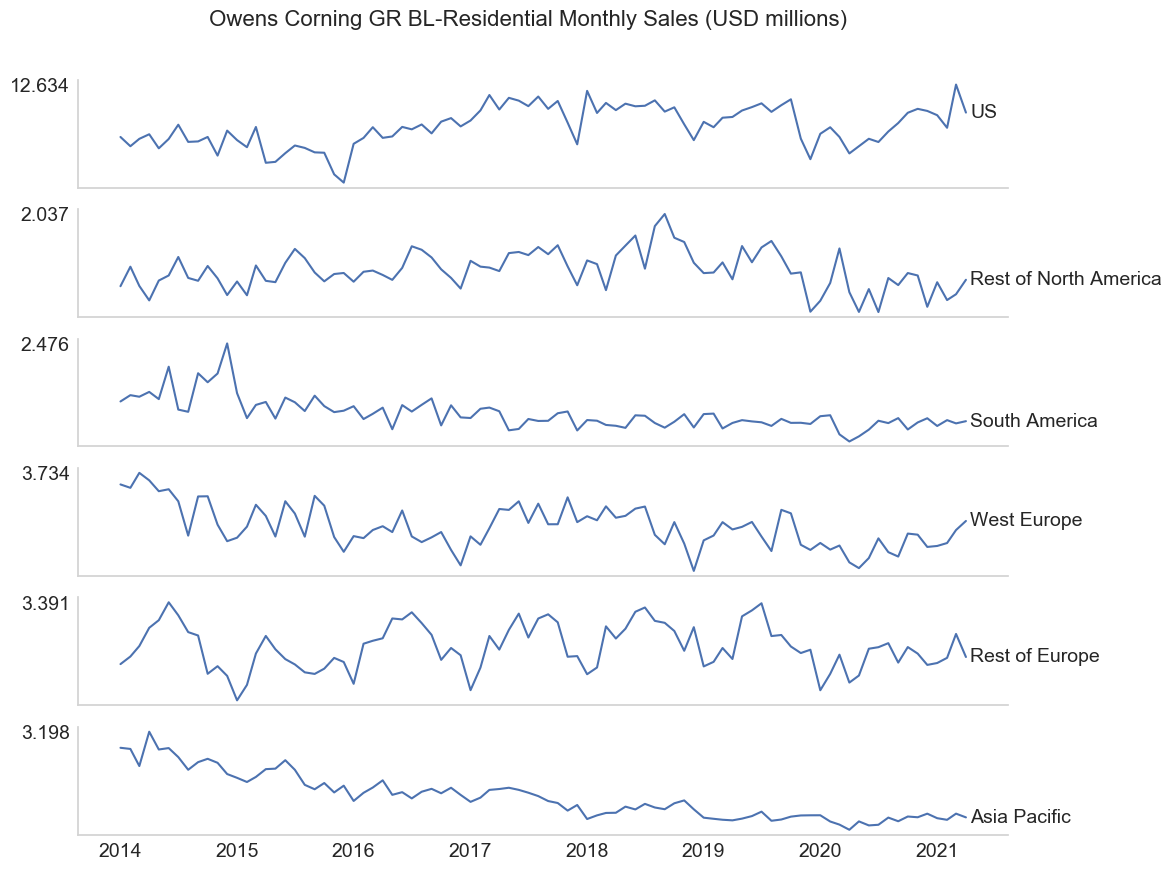

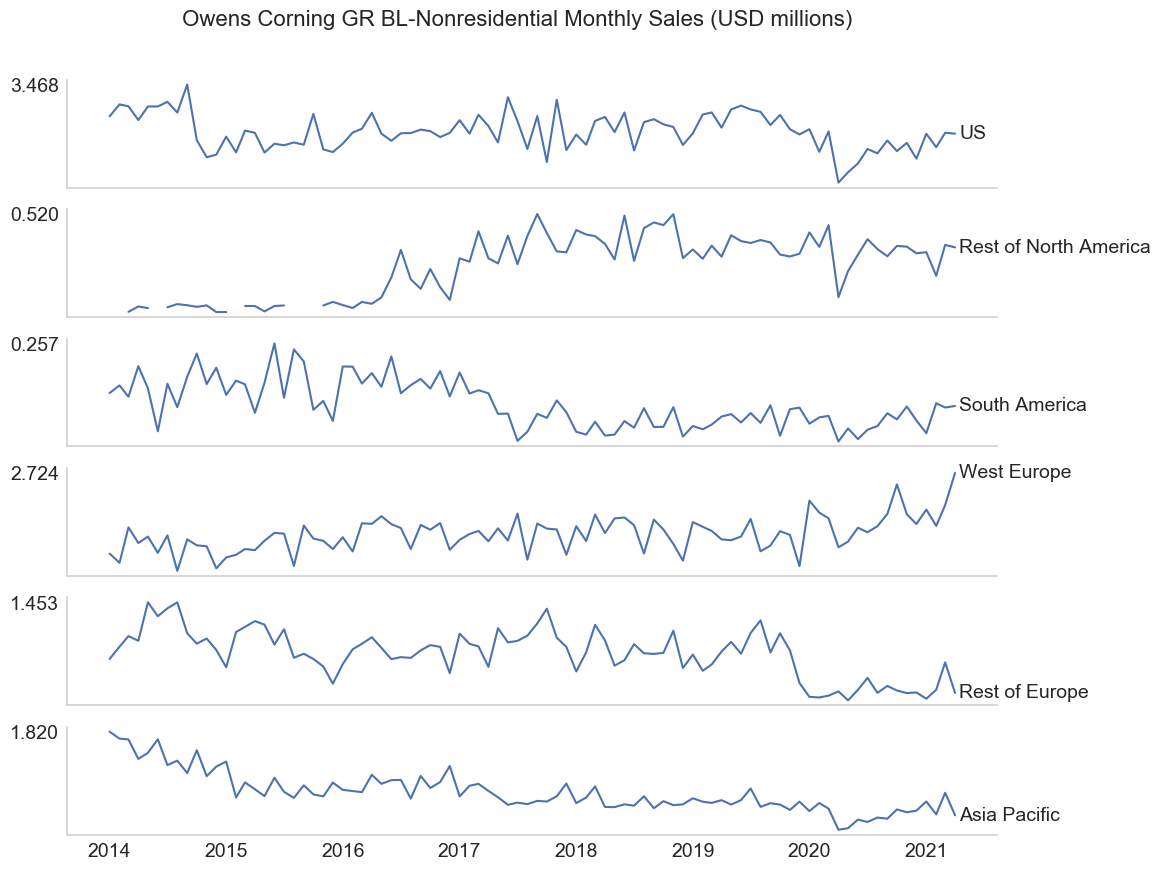

In [57]:
for series in ["BL-RESIDENTIAL", "BL-NONRESIDENTIAL"]:

    bc_sub = BC[BC['End Use Market (Sub)'] == series]

    line1 = bc_sub[bc_sub['Country'] == "USA"]
    line2 = bc_sub[(bc_sub['Country'] != "USA") & (bc_sub['SubRegion'] == "North America")]
    line3 = bc_sub[bc_sub['SubRegion'] == "South America"]
    line4 = bc_sub[bc_sub['SubRegion'] == "West Europe"]
    line5 = bc_sub[(bc_sub['Region'] == "EU") & (bc_sub['SubRegion'] != "West Europe")]
    line6 = bc_sub[bc_sub['Region'] == "AP"]

    for i in range(1,70):
        if i==1: exec(f'line_plot = line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("US")')
        if i==2: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("Rest of North America"))')
        if i==3: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("South America"))')
        if i==4: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("West Europe"))')
        if i==5: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("Rest of Europe"))')
        if i==6: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("Asia Pacific"))')

    print(series)
    print(line_plot.max())
    
    scale = 1000000 #converts to millions
    fig, ax = plt.subplots(6,1, figsize=(12,10), sharex = True)
    #fig.text(0.04, 0.5, 'Sales (in USD millions)', va='center', rotation='vertical')
    fig.suptitle("Owens Corning GR " + series.split("-")[0] + "-" + series.split("-")[1].title() + " Monthly Sales (USD millions)" , y=0.95, size=16)

    for i in range(0,6):
        ax[i].plot(line_plot.index, line_plot.iloc[:,i]/scale) 
        for spn in ["top", "right"]:
            ax[i].spines[spn].set_visible(False)
        for spn in ["left", "bottom"]:
            ax[i].spines[spn].set_color("lightgray")

        #annotating
        y = ax[i].lines[0].get_ydata()[-1]
        if np.isnan(y): #if the data is missing it will not write the name of the series
            y = (line_plot.max()[i]/scale) #putting the name in the center of y axis
            ax[i].annotate(line_plot.columns[i], xy=(0.95,y), xytext=(6,0), 
                xycoords = ax[i].get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

        else: 
            ax[i].annotate(line_plot.columns[i], xy=(0.95,y), xytext=(6,0), 
                    xycoords = ax[i].get_yaxis_transform(), textcoords="offset points",
                    size=14, va="center")

        # setting yticks
        ax[i].set_yticks([line_plot.max()[i]/scale])
        ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

        ax[i].tick_params('y', labelsize =14, pad=0)
        ax[i].tick_params('x', labelsize =14, pad=0)

    fig.savefig("NWTF" + series + ".png", bbox_inches='tight',pad_inches = 0)

# NWTF

In [58]:
path = <use yours>
used_columns = ['External/Downstream', 'End Use Market', 'Sales', 'Region', 'End Use Market Sub', 'End Use Market', 'Country', 'Year', 'Month']
nw_revenue = pd.read_excel(path + "Condensed_Downstream_(NW, TF)_2011-05.2021_Sales_Data.xlsx", usecols = used_columns)
nw_revenue.rename(columns={"End Use Market Sub":"End Use Market (Sub)"}, inplace=True)
nw_revenue

,Region,Country,External/Downstream,Year,Month,Sales,End Use Market,End Use Market (Sub)
0,AM,USA,External,2011,9,77415.77,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL
1,AM,USA,External,2011,4,7406.43,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL
2,AM,USA,External,2011,12,27977.88,INFRASTRUCTURE,IF-WATER & SEWAGE TREATMENT & DISTRIBUTION
3,EU,Denmark,External,2011,1,0.00,POWER & ENERGY,PE-RENEWABLE ENERGY GENERATION
4,AP,Australia,External,2011,6,5308.01,POWER & ENERGY,PE-RENEWABLE ENERGY GENERATION
...,...,...,...,...,...,...,...,...
287022,10K DATA PLUG,10K DATA PLUG,External,2020,8,-195742.17,10K DATA PLUG,10K DATA PLUG
287023,10K DATA PLUG,10K DATA PLUG,External,2020,9,-195742.17,10K DATA PLUG,10K DATA PLUG
287024,10K DATA PLUG,10K DATA PLUG,External,2020,10,-195742.17,10K DATA PLUG,10K DATA PLUG
287025,10K DATA PLUG,10K DATA PLUG,External,2020,11,-195742.17,10K DATA PLUG,10K DATA PLUG


In [59]:
nw_revenue = nw_revenue[nw_revenue['External/Downstream']=='External']
nw_revenue = nw_revenue[nw_revenue['End Use Market']!= '10K REVENUE PLUG']
nw_revenue = nw_revenue[nw_revenue['End Use Market']!= 'BPC DATA PLUG']
nw_revenue = nw_revenue[nw_revenue['End Use Market (Sub)']!= 'NOT ASSIGNED']
nw_revenue = nw_revenue[nw_revenue['Sales']>=0]
BC = nw_revenue[nw_revenue['End Use Market']=='BUILDING & CONSTRUCTION']

In [60]:
#add dates 
BC['Date'] = pd.to_datetime(BC[["Year", 'Month']].assign(DAY=1))

#add subregion
country_region = pd.read_excel("country_subregion.xlsx", usecols = ["Country","SubRegion"])
BC = BC.merge(country_region, how="left", on="Country")

BC.set_index('Date', drop=True, inplace=True)
BC

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Region,Country,External/Downstream,Year,Month,Sales,End Use Market,End Use Market (Sub),SubRegion
Date,,,,,,,,,
2011-09-01,AM,USA,External,2011,9,77415.77,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,North America
2011-04-01,AM,USA,External,2011,4,7406.43,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,North America
2011-12-01,EU,Israel,External,2011,12,36784.43,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,Middle East
2011-12-01,EU,Israel,External,2011,12,52734.52,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,Middle East
2011-11-01,EU,France,External,2011,11,0.00,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,West Europe
...,...,...,...,...,...,...,...,...,...
2021-05-01,AM,USA,External,2021,5,101621.28,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,North America
2021-05-01,AM,Canada,External,2021,5,93320.88,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,North America
2021-05-01,AM,Canada,External,2021,5,92372.52,BUILDING & CONSTRUCTION,BL-NONRESIDENTIAL,North America


BL-RESIDENTIAL
US                      20392912.89
Rest of North America     629220.07
South America               4943.56
West Europe                 5319.19
Rest of Europe             20875.97
Asia Pacific              576250.18
dtype: float64
BL-NONRESIDENTIAL
US                      16593980.11
Rest of North America    1598908.37
South America             143608.82
West Europe             11287619.91
Rest of Europe           8936164.11
Asia Pacific              833144.06
dtype: float64


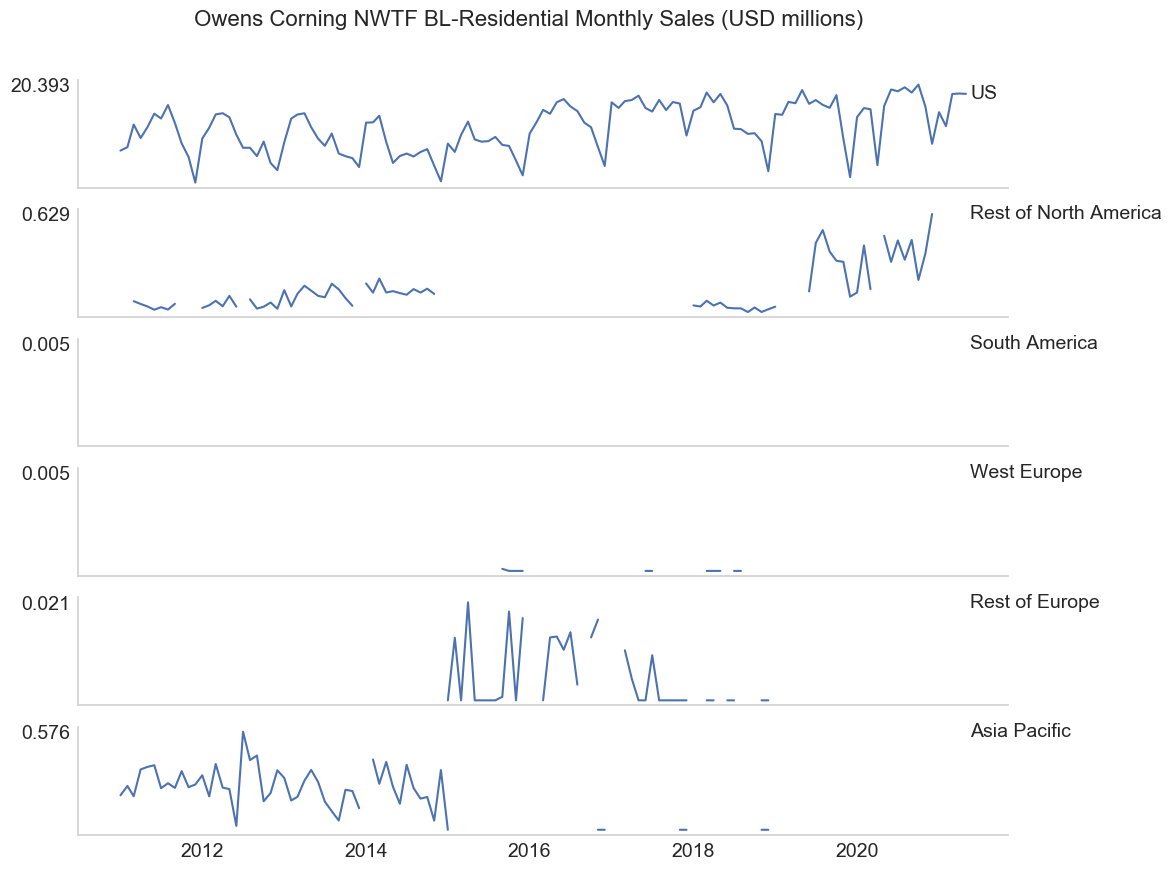

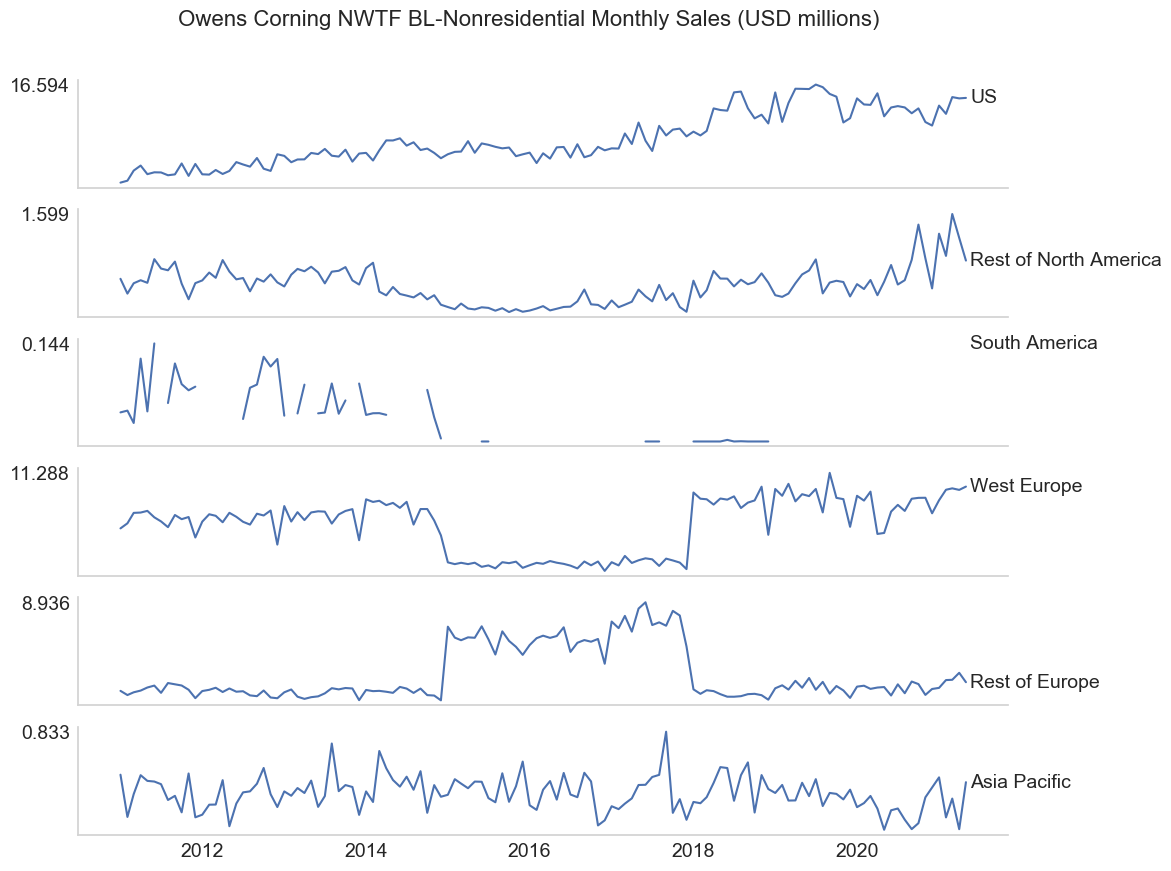

In [61]:
for series in ["BL-RESIDENTIAL", "BL-NONRESIDENTIAL"]:

    bc_sub = BC[BC['End Use Market (Sub)'] == series]

    line1 = bc_sub[bc_sub['Country'] == "USA"]
    line2 = bc_sub[(bc_sub['Country'] != "USA") & (bc_sub['SubRegion'] == "North America")]
    line3 = bc_sub[bc_sub['SubRegion'] == "South America"]
    line4 = bc_sub[bc_sub['SubRegion'] == "West Europe"]
    line5 = bc_sub[(bc_sub['Region'] == "EU") & (bc_sub['SubRegion'] != "West Europe")]
    line6 = bc_sub[bc_sub['Region'] == "AP"]

    for i in range(1,70):
        if i==1: exec(f'line_plot = line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("US")')
        if i==2: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("Rest of North America"))')
        if i==3: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("South America"))')
        if i==4: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("West Europe"))')
        if i==5: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("Rest of Europe"))')
        if i==6: exec(f'line_plot = line_plot.join(line{i}.groupby(line{i}.index)["Sales"].sum().to_frame("Asia Pacific"))')

    print(series)
    print(line_plot.max())
    
    scale = 1000000 #converts to millions
    fig, ax = plt.subplots(6,1, figsize=(12,10), sharex = True)
    #fig.text(0.04, 0.5, 'Sales (in USD millions)', va='center', rotation='vertical')
    fig.suptitle("Owens Corning NWTF " + series.split("-")[0] + "-" + series.split("-")[1].title() + " Monthly Sales (USD millions)" , y=0.95, size=16)

    for i in range(0,6):
        ax[i].plot(line_plot.index, line_plot.iloc[:,i]/scale) 
        for spn in ["top", "right"]:
            ax[i].spines[spn].set_visible(False)
        for spn in ["left", "bottom"]:
            ax[i].spines[spn].set_color("lightgray")

        #annotating
        y = ax[i].lines[0].get_ydata()[-1]
        if np.isnan(y): #if the data is missing it will not write the name of the series
            y = (line_plot.max()[i]/scale) #putting the name in the center of y axis
            ax[i].annotate(line_plot.columns[i], xy=(0.95,y), xytext=(6,0), 
                xycoords = ax[i].get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

        else: 
            ax[i].annotate(line_plot.columns[i], xy=(0.95,y), xytext=(6,0), 
                    xycoords = ax[i].get_yaxis_transform(), textcoords="offset points",
                    size=14, va="center")

        # setting yticks
        ax[i].set_yticks([line_plot.max()[i]/scale])
        ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

        ax[i].tick_params('y', labelsize =14, pad=0)
        ax[i].tick_params('x', labelsize =14, pad=0)

    fig.savefig("NWTF" + series + ".png", bbox_inches='tight',pad_inches = 0)

